In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:\Downloads\car.csv")
df.count()
df.head()

,c1,c2,c3,c4,c5,c6,Classification
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']
df.buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
df.maint.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
df.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
df.persons.replace(('2','4','more'),(1,2,3), inplace=True)
df.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
df.safety.replace(('low','med','high'),(1,2,3), inplace=True)
df.classes.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

In [5]:
df.shape

(1728, 7)

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


In [7]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,classes
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,1.750000,1.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,3.250000,3.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000


array([[<AxesSubplot:title={'center':'buying'}>,
        <AxesSubplot:title={'center':'maint'}>,
        <AxesSubplot:title={'center':'doors'}>],
       [<AxesSubplot:title={'center':'persons'}>,
        <AxesSubplot:title={'center':'lug_boot'}>,
        <AxesSubplot:title={'center':'safety'}>],
       [<AxesSubplot:title={'center':'classes'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

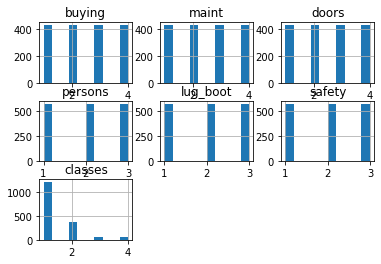

In [8]:
df.hist()

In [10]:
dataset = df.values

X = dataset[:,0:6]
Y = np.asarray(dataset[:,6], dtype="S6")

# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_Train, Y_Train)
p=clf.predict(X_Test)
score = accuracy_score(Y_Test, p)
print(classification_report(Y_Test,p))
print(score)


              precision    recall  f1-score   support

        b'1'       0.97      0.99      0.98       236
        b'2'       0.92      0.88      0.90        83
        b'3'       0.82      1.00      0.90        14
        b'4'       1.00      0.77      0.87        13

    accuracy                           0.95       346
   macro avg       0.93      0.91      0.91       346
weighted avg       0.95      0.95      0.95       346

0.953757225433526


C:\Users\shanm\.conda\envs\sathish\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
